In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

In [2]:
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 12

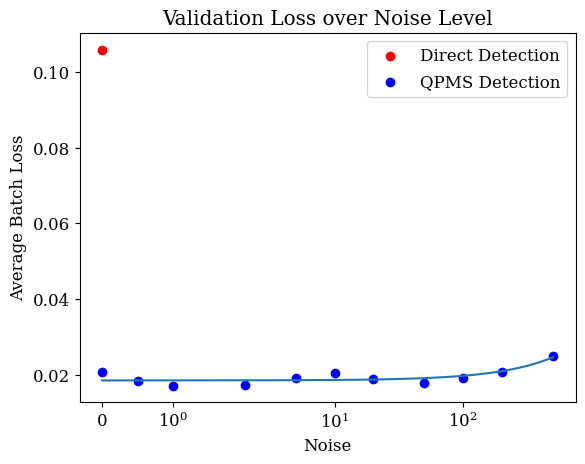

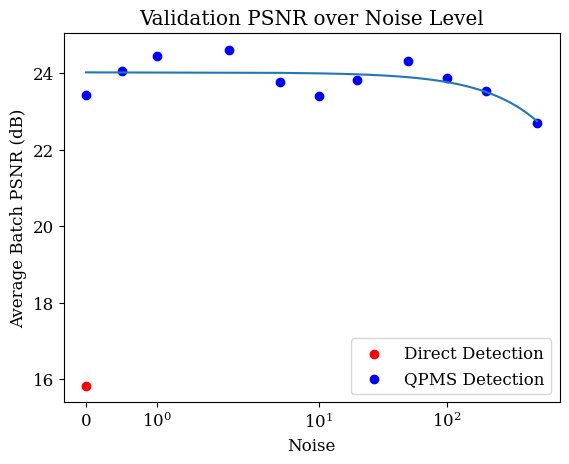

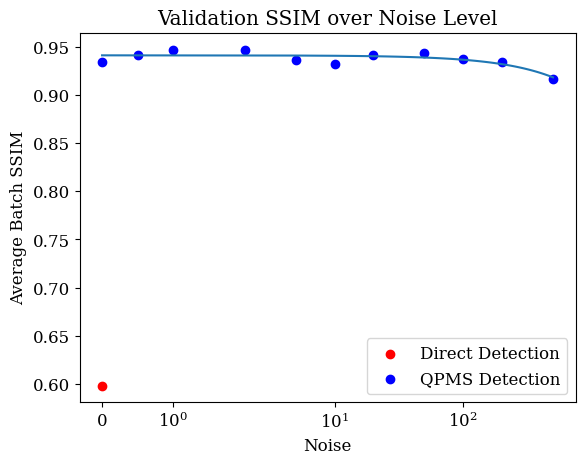

In [3]:
results = pd.read_csv("../data/features/withASE/reconstruction_results.csv")
direct = results[results["detection_type"] == "Direct Detection"]
qpms = results[results["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results["noise"]), np.max(results["noise"]), 100)

plt.scatter(direct["noise"], direct["val_loss"], color='r', label="Direct Detection")
plt.scatter(qpms["noise"], qpms["val_loss"], color='b', label="QPMS Detection")
[a,b] = np.polyfit(qpms["noise"], qpms["val_loss"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
plt.xscale("symlog")
plt.title("Validation Loss over Noise Level")
plt.ylabel("Average Batch Loss")
plt.xlabel("Noise")
plt.legend()
plt.show()

plt.scatter(direct["noise"], direct["val_psnr"], color='r', label="Direct Detection")
plt.scatter(qpms["noise"], qpms["val_psnr"], color='b', label="QPMS Detection")
[a,b] = np.polyfit(qpms["noise"], qpms["val_psnr"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
plt.xscale("symlog")
plt.title("Validation PSNR over Noise Level")
plt.ylabel("Average Batch PSNR (dB)")
plt.xlabel("Noise")
plt.legend()
plt.show()

plt.scatter(direct["noise"], direct["val_ssim"], color='r', label="Direct Detection")
plt.scatter(qpms["noise"], qpms["val_ssim"], color='b', label="QPMS Detection")
[a,b] = np.polyfit(qpms["noise"], qpms["val_ssim"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
plt.xscale("symlog")
plt.title("Validation SSIM over Noise Level")
plt.ylabel("Average Batch SSIM")
plt.xlabel("Noise")
plt.legend()
plt.show()

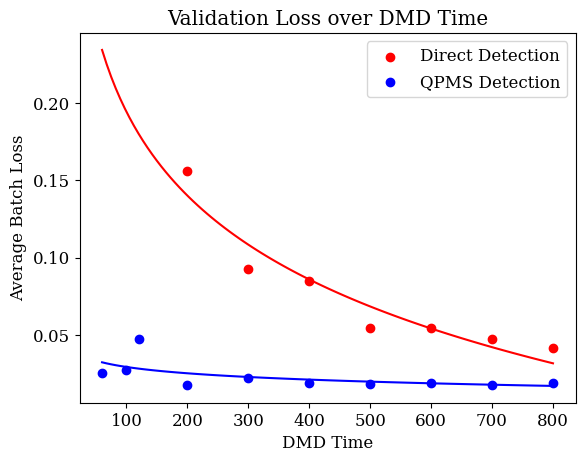

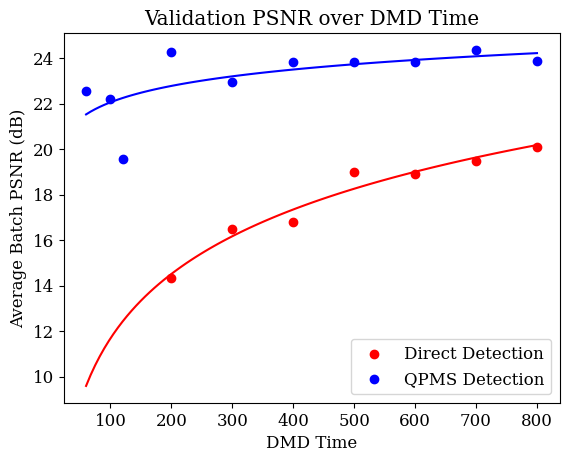

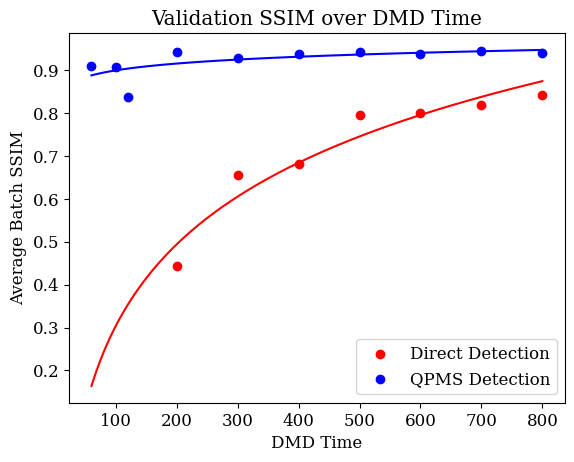

In [11]:
results = pd.read_csv("../data/features/withoutASE/reconstruction_results.csv")
direct = results[results["detection_type"] == "Direct Detection"]
qpms = results[results["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results["dmd_time"]), np.max(results["dmd_time"]), 100)

plt.scatter(direct["dmd_time"], direct["val_loss"], color='r', label="Direct Detection")
plt.scatter(qpms["dmd_time"], qpms["val_loss"], color='b', label="QPMS Detection")
[a,b] = np.polyfit(np.log(direct["dmd_time"]), direct["val_loss"], 1)
y_fitted = a*np.log(x_fitted) + b
plt.plot(x_fitted, y_fitted, 'r')
[a,b] = np.polyfit(np.log(qpms["dmd_time"]), qpms["val_loss"], 1)
y_fitted = a*np.log(x_fitted) + b
plt.plot(x_fitted, y_fitted, 'b')
plt.title("Validation Loss over DMD Time")
plt.ylabel("Average Batch Loss")
plt.xlabel("DMD Time")
plt.legend()
plt.show()


plt.scatter(direct["dmd_time"], direct["val_psnr"], color='r', label="Direct Detection")
plt.scatter(qpms["dmd_time"], qpms["val_psnr"], color='b', label="QPMS Detection")
[a,b] = np.polyfit(np.log(direct["dmd_time"]), direct["val_psnr"], 1)
y_fitted = a*np.log(x_fitted) + b
plt.plot(x_fitted, y_fitted, 'r')
[a,b] = np.polyfit(np.log(qpms["dmd_time"]), qpms["val_psnr"], 1)
y_fitted = a*np.log(x_fitted) + b
plt.plot(x_fitted, y_fitted, 'b')
plt.title("Validation PSNR over DMD Time")
plt.ylabel("Average Batch PSNR (dB)")
plt.xlabel("DMD Time")
plt.legend()
plt.show()


plt.scatter(direct["dmd_time"], direct["val_ssim"], color='r', label="Direct Detection")
plt.scatter(qpms["dmd_time"], qpms["val_ssim"], color='b', label="QPMS Detection")
[a,b] = np.polyfit(np.log(direct["dmd_time"]), direct["val_ssim"], 1)
y_fitted = a*np.log(x_fitted) + b
plt.plot(x_fitted, y_fitted, 'r')
[a,b] = np.polyfit(np.log(qpms["dmd_time"]), qpms["val_ssim"], 1)
y_fitted = a*np.log(x_fitted) + b
plt.plot(x_fitted, y_fitted, 'b')
plt.title("Validation SSIM over DMD Time")
plt.ylabel("Average Batch SSIM")
plt.xlabel("DMD Time")
plt.legend()
plt.show()

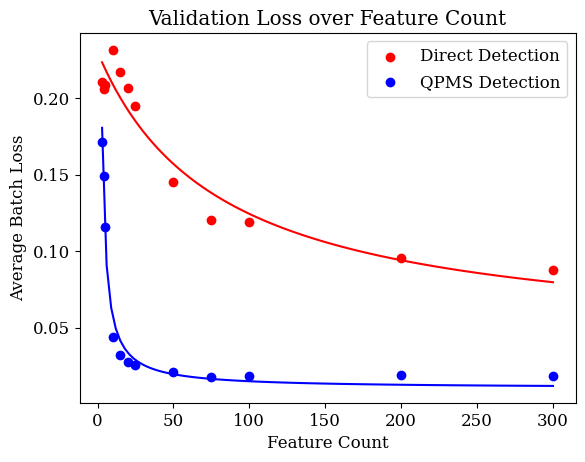

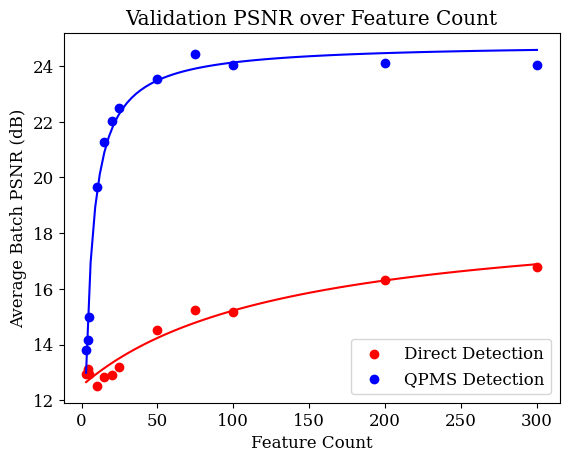

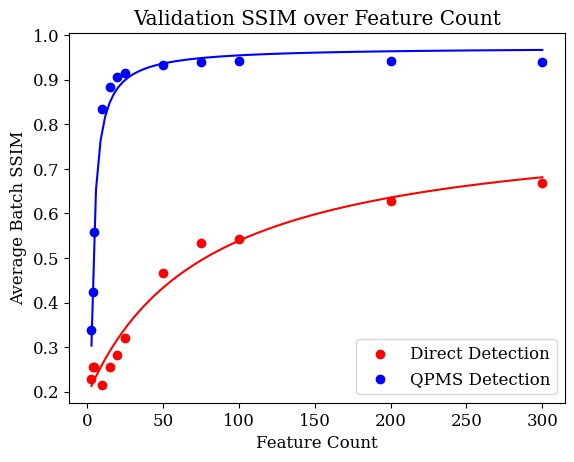

In [28]:
results = pd.read_csv("../data/features//varied_features_results.csv")
direct = results[results["detection_type"] == "Direct Detection"]
qpms = results[results["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results["num_features"]), np.max(results["num_features"]), 100)

plt.scatter(direct["num_features"], direct["val_loss"], color='r', label="Direct Detection")
plt.scatter(qpms["num_features"], qpms["val_loss"], color='b', label="QPMS Detection")
[a,b,c], _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, direct["num_features"], direct["val_loss"])
y_fitted = (a / (x_fitted + b)) + c
plt.plot(x_fitted, y_fitted, 'r')
[a,b,c], _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, qpms["num_features"], qpms["val_loss"])
y_fitted = (a / (x_fitted + b)) + c
plt.plot(x_fitted, y_fitted, 'b')
plt.title("Validation Loss over Feature Count")
plt.ylabel("Average Batch Loss")
plt.xlabel("Feature Count")
plt.legend()
plt.show()


plt.scatter(direct["num_features"], direct["val_psnr"], color='r', label="Direct Detection")
plt.scatter(qpms["num_features"], qpms["val_psnr"], color='b', label="QPMS Detection")
p0, _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, direct["num_features"], direct["val_ssim"])
p0[0] = np.mean(direct["val_psnr"]/direct["val_ssim"])*p0[0]
[a,b,c], _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, direct["num_features"], direct["val_psnr"], p0=p0)
y_fitted = (a / (x_fitted + b)) + c
plt.plot(x_fitted, y_fitted, 'r')
p0, _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, qpms["num_features"], qpms["val_ssim"])
p0[0] = np.mean(qpms["val_psnr"]/qpms["val_ssim"])*p0[0]
[a,b,c], _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, qpms["num_features"], qpms["val_psnr"], p0=p0)
y_fitted = (a / (x_fitted + b)) + c
plt.plot(x_fitted, y_fitted, 'b')
plt.title("Validation PSNR over Feature Count")
plt.ylabel("Average Batch PSNR (dB)")
plt.xlabel("Feature Count")
plt.legend()
plt.show()


plt.scatter(direct["num_features"], direct["val_ssim"], color='r', label="Direct Detection")
plt.scatter(qpms["num_features"], qpms["val_ssim"], color='b', label="QPMS Detection")
[a,b,c], _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, direct["num_features"], direct["val_ssim"])
y_fitted = (a / (x_fitted + b)) + c
plt.plot(x_fitted, y_fitted, 'r')
[a,b,c], _ = curve_fit(lambda x,a,b,c: (a/(x+b))+c, qpms["num_features"], qpms["val_ssim"])
y_fitted = (a / (x_fitted + b)) + c
plt.plot(x_fitted, y_fitted, 'b')
plt.title("Validation SSIM over Feature Count")
plt.ylabel("Average Batch SSIM")
plt.xlabel("Feature Count")
plt.legend()
plt.show()